In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

sns.set(style="white")

In [2]:
base_data = pd.read_csv('Combined_pop_traffic_data.csv')
base_data.head()

,State,Region,Density,Pop,LandArea,cars_registered,trucks_registered,Max_1yr_prob,Average_1yr_prob,Score
0,DC,2,11665.0984,711571,61,208141,128699.966,NaN,NaN,NaN
1,NJ,1,1213.2917,8922547,7354,2798699,3080935.740,NaN,NaN,NaN
2,RI,1,1021.9903,1056738,1034,420313,419313.782,NaN,NaN,NaN
3,MA,1,889.6632,6939373,7800,2208468,2674324.285,NaN,NaN,NaN
4,CT,1,736.8589,3567871,4842,1302339,1422502.027,NaN,NaN,NaN


In [3]:
state_ave = pd.read_csv('state_average.csv')
state_ave.head()

,Kind Of Material,Structure Type,averageDailyTraffic,avgDailyTruckTraffic,countyCode,lengthOfMaximumSpan,maintenanceReponsibility,owner,structureLength,year,yearBuilt,yearReconstructed,Age,Avg. Daily Precipitation (mm),ADTT,state name,snowfall,freezethaw
0,4.447359,3.052960,2518.706351,5.992780,176.081002,23.467371,16.769251,16.707526,52.245995,2005.250126,1957.016758,359.169057,48.233368,NaN,99.980904,AK,170.401426,62.731688
1,3.052416,4.041248,4493.979877,7.760035,71.264077,14.179244,2.623060,2.632570,67.986463,2004.334297,1965.728725,211.446098,38.605573,3.702985,531.107621,AL,8.190850,45.208794
2,2.595736,6.345821,2789.383048,2.130567,77.996620,12.543413,2.279280,2.295607,50.158840,2004.275771,1969.342464,250.349775,34.933306,3.413067,133.016909,AR,17.876667,63.000488
3,3.665722,3.096676,13077.833312,10.816974,14.413806,21.778474,8.194323,8.314714,67.309536,2005.045788,1969.926218,319.582101,35.119570,0.832667,1467.253986,AZ,7.436030,34.635005
4,3.016115,3.378722,24258.070904,7.206279,58.147067,21.892843,3.276809,3.396553,69.220609,2004.767593,1948.968435,267.650486,55.799159,1.966724,1667.962861,CA,13.078865,17.189136


In [4]:
region1_data = base_data[base_data['Region'] == 1]
region2_data = base_data[base_data['Region'] == 2]
region3_data = base_data[base_data['Region'] == 3]
region4_data = base_data[base_data['Region'] == 4]


In [5]:
base_data = base_data.merge(state_ave, left_on='State', right_on='state name', how='left')
data_num = base_data[['State', 'Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'Max_1yr_prob', 
                       'Average_1yr_prob', 'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 
                       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT', 'state name', 'snowfall', 
                       'freezethaw']]
data_num.fillna(0, inplace=True)
data_num.columns

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Index(['State', 'Density', 'Pop', 'LandArea', 'cars_registered',
       'trucks_registered', 'Max_1yr_prob', 'Average_1yr_prob',
       'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan',
       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT',
       'state name', 'snowfall', 'freezethaw'],
      dtype='object')

In [6]:
region1 = region1_data.merge(state_ave, left_on='State', right_on='state name', how='left')
region1_num = region1[['State', 'Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'Max_1yr_prob', 
                       'Average_1yr_prob', 'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 
                       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT', 'state name', 'snowfall', 
                       'freezethaw']]
region1_num.fillna(0, inplace=True)


region2 = region2_data.merge(state_ave, left_on='State', right_on='state name', how='left')
region2_num = region2[['State', 'Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'Max_1yr_prob', 
                       'Average_1yr_prob', 'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 
                       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT', 'state name', 'snowfall', 
                       'freezethaw']]
region2_num.fillna(0, inplace=True)


region3 = region3_data.merge(state_ave, left_on='State', right_on='state name', how='left')
region3_num = region3[['State', 'Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'Max_1yr_prob', 
                       'Average_1yr_prob', 'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 
                       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT', 'state name', 'snowfall', 
                       'freezethaw']]
region3_num.fillna(0, inplace=True)


region4 = region4_data.merge(state_ave, left_on='State', right_on='state name', how='left')
region4_num = region4[['State', 'Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'Max_1yr_prob', 
                       'Average_1yr_prob', 'averageDailyTraffic', 'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 
                       'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 'ADTT', 'state name', 'snowfall', 
                       'freezethaw']]
region4_num.fillna(0, inplace=True)




/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [7]:
list_of_states = [['probabilitiesDC.csv', 2],
                  ['probabilitiesNJ.csv', 1],
                  ['probabilitiesRI.csv', 1],
                  ['probabilitiesMA.csv', 1],
                  ['probabilitiesCT.csv', 1],
                  ['probabilitiesMD.csv', 2],
                  ['probabilitiesDE.csv', 2],
                  ['probabilitiesNY.csv', 1],
                  ['probabilitiesFL.csv', 2],
                  ['probabilitiesOH.csv', 3],
                  ['probabilitiesPA.csv', 1],
                  ['probabilitiesCA.csv', 4],
                  ['probabilitiesIL.csv', 3],
                  ['probabilitiesHI.csv', 5],
                  ['probabilitiesVA.csv', 2],
                  ['probabilitiesNC.csv', 2],
                  ['probabilitiesIN.csv', 3],
                  ['probabilitiesGA.csv', 2],
                  ['probabilitiesMI.csv', 3],
                  ['probabilitiesSC.csv', 2],
                  ['probabilitiesTN.csv', 2],
                  ['probabilitiesNH.csv', 1],
                  ['probabilitiesWA.csv', 4],
                  ['probabilitiesKY.csv', 2],
                  ['probabilitiesTX.csv', 2],
                  ['probabilitiesWI.csv', 3],
                  ['probabilitiesLA.csv', 2],
                  ['probabilitiesAL.csv', 2],
                  ['probabilitiesMO.csv', 3],
                  ['probabilitiesWV.csv', 2],
                  ['probabilitiesMN.csv', 3],
                  ['probabilitiesVT.csv', 1],
                  ['probabilitiesAZ.csv', 4],
                  ['probabilitiesMS.csv', 2],
                  ['probabilitiesAR.csv', 2],
                  ['probabilitiesOK.csv', 2],
                  ['probabilitiesIA.csv', 3],
                  ['probabilitiesCO.csv', 4],
                  ['probabilitiesOR.csv', 4],
                  ['probabilitiesME.csv', 1],
                  ['probabilitiesUT.csv', 4],
                  ['probabilitiesKS.csv', 3],
                  ['probabilitiesNEV.csv', 4],
                  ['probabilitiesNEB.csv', 3],
                  ['probabilitiesID.csv', 4],
                  ['probabilitiesNM.csv', 4],
                  ['probabilitiesSD.csv', 3],
                  ['probabilitiesND.csv', 3],
                  ['probabilitiesMT.csv', 4],
                  ['probabilitiesWY.csv', 4],
                  ['probabilitiesAK.csv', 6]]

In [8]:
# ageGroup1 = 
# ageGroup2 = 
# ageGroup3 = 

In [9]:
list_of_states = pd.DataFrame(list_of_states, columns=['State', 'Region'])
# list_of_states.columns = ['State', 'Region']
states = list_of_states[list_of_states['Region'] == 2]
states = states['State'].values.tolist()
states

['probabilitiesDC.csv',
 'probabilitiesMD.csv',
 'probabilitiesDE.csv',
 'probabilitiesFL.csv',
 'probabilitiesVA.csv',
 'probabilitiesNC.csv',
 'probabilitiesGA.csv',
 'probabilitiesSC.csv',
 'probabilitiesTN.csv',
 'probabilitiesKY.csv',
 'probabilitiesTX.csv',
 'probabilitiesLA.csv',
 'probabilitiesAL.csv',
 'probabilitiesWV.csv',
 'probabilitiesMS.csv',
 'probabilitiesAR.csv',
 'probabilitiesOK.csv']

In [10]:
'''Change the line outside the for loop block to select region'''


temp = []
for state in states:
    data = pd.read_csv(state)
    temp.append(max(data['1yr Prob']))
region2_num['Max_1yr_prob'] = temp

temp = []
for state in states:
    data = pd.read_csv(state)
    temp.append(np.mean(data['1yr Prob']))
region2_num['Average_1yr_prob'] = temp


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
data_num.to_csv('states_external_prob_data.csv', index=False)
data_num

,State,Density,Pop,LandArea,cars_registered,trucks_registered,Max_1yr_prob,Average_1yr_prob,averageDailyTraffic,avgDailyTruckTraffic,lengthOfMaximumSpan,structureLength,Age,Avg. Daily Precipitation (mm),ADTT,state name,snowfall,freezethaw
0,DC,11665.0984,711571,61,208141,1.287000e+05,0.0,0.0,33610.865178,3.374578,26.170416,106.406508,50.606299,3.100000,1284.742132,DC,29.023296,81.119068
1,NJ,1213.2917,8922547,7354,2798699,3.080936e+06,0.0,0.0,21693.116986,4.647679,20.626895,59.975935,47.348299,3.343333,1390.967889,NJ,42.443181,89.019353
2,RI,1021.9903,1056738,1034,420313,4.193138e+05,0.0,0.0,19260.974512,9.216026,23.795435,60.960822,46.682436,3.372000,1784.803929,RI,45.301147,85.323043
3,MA,889.6632,6939373,7800,2208468,2.674324e+06,0.0,0.0,23384.574687,7.849047,20.537339,49.224426,52.023474,3.339286,2302.027406,MA,64.582137,91.065479
4,CT,736.8589,3567871,4842,1302339,1.422502e+06,0.0,0.0,18295.897432,5.700121,22.821133,52.471081,43.570824,3.405000,1572.095129,CT,54.237107,91.815611
5,MD,624.5923,6062917,9707,2006904,2.209445e+06,0.0,0.0,20228.447014,5.615803,23.818907,74.350955,46.399381,3.157917,1358.723922,MD,35.783533,84.887408
6,DE,500.2735,975033,1949,419199,5.199614e+05,0.0,0.0,14957.746195,7.919064,24.760001,88.467431,37.974988,3.153333,1304.170205,DE,28.100018,77.250137
7,NY,413.6005,19491339,47126,4563035,5.821796e+06,0.0,0.0,10393.089156,8.187385,22.985048,55.575490,44.414473,3.046290,931.442730,NY,95.901090,90.503741
8,FL,403.6579,21646155,53625,7778493,8.534913e+06,0.0,0.0,16369.460717,7.277832,18.447368,97.650442,30.436677,3.656119,1334.864176,FL,0.315282,5.564338
9,OH,286.7910,11718568,40861,4605459,5.752346e+06,0.0,0.0,5920.014598,6.360599,15.900244,35.863331,42.648550,2.729091,666.390671,OH,69.114623,91.568388


In [12]:
corr = region2_num.corr()


corrInd,pvalue = pearsonr(region2_num['Density'],region2_num['Pop'])
# data_num.corr()
pvalue

0.38443476633961593

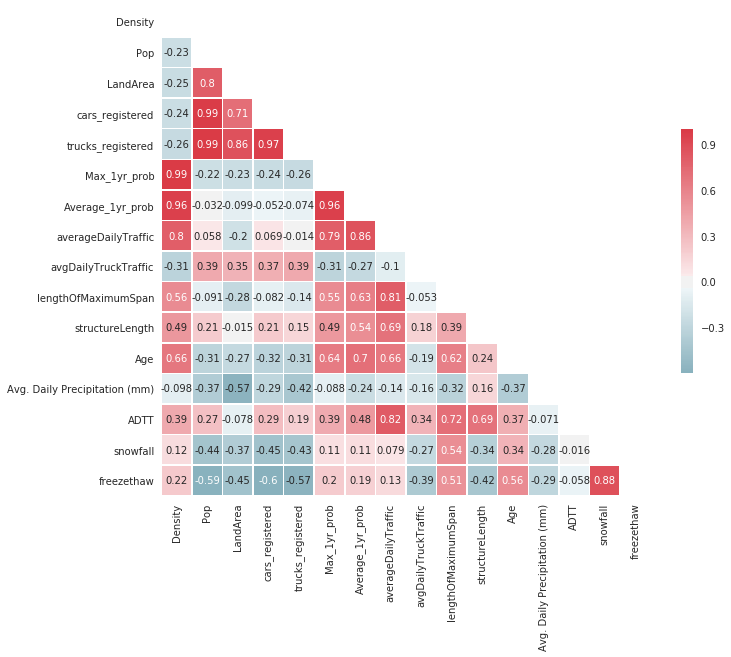

In [13]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [14]:
# divide states by census regions or other larger groupings
# group probability calcs into age groups 10-40 and 40-80 or 10-60 and 60-80 
# apply grouping to the state averages level, not within the actuarial models
# filter data based on lower variance (less than 2 SD)
# consider the median 

In [15]:
base_data2 = region2_num.drop(['State', 'state name'], axis=1)
base_data2

,Density,Pop,LandArea,cars_registered,trucks_registered,Max_1yr_prob,Average_1yr_prob,averageDailyTraffic,avgDailyTruckTraffic,lengthOfMaximumSpan,structureLength,Age,Avg. Daily Precipitation (mm),ADTT,snowfall,freezethaw
0,11665.0984,711571,61,208141,1.287000e+05,0.632121,0.018470,33610.865178,3.374578,26.170416,106.406508,50.606299,3.100000,1284.742132,29.023296,81.119068
1,624.5923,6062917,9707,2006904,2.209445e+06,0.052619,0.004502,20228.447014,5.615803,23.818907,74.350955,46.399381,3.157917,1358.723922,35.783533,84.887408
2,500.2735,975033,1949,419199,5.199614e+05,0.039211,0.001234,14957.746195,7.919064,24.760001,88.467431,37.974988,3.153333,1304.170205,28.100018,77.250137
3,403.6579,21646155,53625,7778493,8.534913e+06,0.023822,0.003154,16369.460717,7.277832,18.447368,97.650442,30.436677,3.656119,1334.864176,0.315282,5.564338
4,217.0662,8571946,39490,3251339,4.034926e+06,0.022987,0.003681,8195.010381,3.575397,18.271205,58.651106,41.035106,3.063235,410.740764,33.610141,86.970108
5,215.9229,10497741,48618,3317918,4.531463e+06,0.016000,0.001086,4959.285859,7.149431,15.158624,46.408936,36.014513,3.353500,596.676117,21.318838,70.226210
6,184.7890,10627767,57513,3536055,4.665930e+06,0.028983,0.000969,10483.311805,5.445072,15.744319,63.254701,35.393260,3.395346,657.759691,7.376504,43.041024
7,171.2222,5147111,30061,1808401,2.459839e+06,0.004866,0.000228,3783.631396,5.498785,11.642027,53.890309,34.294369,3.256087,337.223380,10.042463,47.697956
8,165.7280,6833793,41235,2325004,3.280359e+06,0.010417,0.000831,9412.426571,7.122917,16.893178,51.361010,36.468402,3.448105,1162.432659,27.340745,72.996621
9,113.5604,4484047,39486,1691085,2.490198e+06,0.005831,0.000501,5016.022586,2.068578,17.886037,43.362300,34.584462,3.344250,289.258114,39.011857,84.077718


In [16]:

columns = ['field1', 'field2', 'P-Value', 'Correlation']
# pvalues = pd.DataFrame(columns=columns)
pvalues = []

for field in base_data2.columns:
    for field2 in base_data2.columns:
        final = []
        corrInd,pvalue = pearsonr(region2_num[field],region2_num[field2])
        final = [field, field2, pvalue, corrInd]
        pvalues.append(final)
pvalues = pd.DataFrame(pvalues, columns=columns)
pvalues

,field1,field2,P-Value,Correlation
0,Density,Density,0.000000e+00,1.000000
1,Density,Pop,3.844348e-01,-0.225380
2,Density,LandArea,3.401553e-01,-0.246525
3,Density,cars_registered,3.503578e-01,-0.241521
4,Density,trucks_registered,3.156429e-01,-0.258911
5,Density,Max_1yr_prob,2.213726e-16,0.994931
6,Density,Average_1yr_prob,1.930104e-09,0.956674
7,Density,averageDailyTraffic,1.304046e-04,0.796423
8,Density,avgDailyTruckTraffic,2.225059e-01,-0.312181
9,Density,lengthOfMaximumSpan,2.059264e-02,0.555564


In [17]:
significantP = pvalues[pvalues['P-Value'] <= .05]
# significantP[significantP['field1'] == 'Max_1yr_prob']
significantP

,field1,field2,P-Value,Correlation
0,Density,Density,0.000000e+00,1.000000
5,Density,Max_1yr_prob,2.213726e-16,0.994931
6,Density,Average_1yr_prob,1.930104e-09,0.956674
7,Density,averageDailyTraffic,1.304046e-04,0.796423
9,Density,lengthOfMaximumSpan,2.059264e-02,0.555564
10,Density,structureLength,4.363976e-02,0.494434
11,Density,Age,3.684296e-03,0.663526
17,Pop,Pop,0.000000e+00,1.000000
18,Pop,LandArea,1.011852e-04,0.803796
19,Pop,cars_registered,4.554677e-13,0.985932


In [18]:
# put non categorical fields in a regression model and use Max_1yr_prob and Ave_1yr_prob as the targets
# break owner into its categories and fill in the counts

In [19]:
# linearX = base_data2[['Density', 'Pop', 'LandArea', 'cars_registered', 'trucks_registered', 'averageDailyTraffic', 
#                       'avgDailyTruckTraffic', 'lengthOfMaximumSpan', 'structureLength', 'Age', 'Avg. Daily Precipitation (mm)', 
#                       'ADTT', 'snowfall', 'freezethaw']]
# linearX = pd.DataFrame(linearX)
# linearY = base_data2[['Max_1yr_prob']]
# linearY = pd.DataFrame(linearY)


In [20]:
# reg = LinearRegression().fit(linearX, linearY)
# reg

In [21]:
# result = sm.ols(formula = 'Max_1yr_prob ~ Density + Pop + LandArea + cars_registered + trucks_registered + averageDailyTraffic + avgDailyTruckTraffic + lengthOfMaximumSpan + structureLength + Age + ADTT + snowfall + freezethaw', data=base_data2).fit()
result = sm.ols(formula = 'Max_1yr_prob ~ Pop + LandArea + cars_registered + trucks_registered + averageDailyTraffic + avgDailyTruckTraffic + lengthOfMaximumSpan + structureLength + Age + ADTT + snowfall + freezethaw', data=base_data2).fit()

result.params


Intercept               4.916164e-01
Pop                    -3.604240e-08
LandArea                3.720651e-06
cars_registered         1.858959e-07
trucks_registered      -1.010372e-07
averageDailyTraffic     5.665997e-05
avgDailyTruckTraffic    4.635116e-02
lengthOfMaximumSpan    -4.645862e-02
structureLength         2.964453e-03
Age                    -2.378127e-02
ADTT                   -3.722227e-04
snowfall                1.224416e-03
freezethaw              7.580059e-03
dtype: float64

In [22]:
result.summary()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Max_1yr_prob   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     21.17
Date:                Fri, 01 May 2020   Prob (F-statistic):            0.00479
Time:                        16:04:01   Log-Likelihood:                 44.144
No. Observations:                  17   AIC:                            -62.29
Df Residuals:                       4   BIC:                            -51.46
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4916      0.158      3.104      0.036       0.052       0.931
Pop                  -3.604e-08   2.32e-08     -1.554      0.195      -1e-07    2.84e-08
LandArea              3.721e-06   1.72e-06      2.164      0.096   -1.05e-06    8.49e-06
cars_registered       1.859e-07   9.28e-08      2.004      0.116   -7.16e-08    4.43e-07
trucks_registered     -1.01e-07   8.58e-08     -1.177      0.304   -3.39e-07    1.37e-07
averageDailyTraffic   5.666e-05   6.95e-06      8.149      0.001    3.74e-05     7.6e-05
avgDailyTruckTraffic     0.0464      0.011      4.211      0.014       0.016       0.077
lengthOfMaximumSpan     -0.0465      0.012     -3.776      0.020      -0.081      -0.012
structureLength          0.0030      0.002      1.841      0.139      -0.002       0.007
Age                     -0.0238      0.006     -3.878      0.018      -0.041      -0.007
ADTT                    -0.0004   7.84e-05     -4.745      0.009      -0.001      -0.000
snowfall                 0.0012      0.002      0.773      0.483      -0.003       0.006
freezethaw               0.0076      0.003      2.621      0.059      -0.000       0.016
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.765
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.213
Skew:                           0.269   Prob(JB):                        0.899
Kurtosis:                       2.890   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
result = sm.ols(formula = 'Average_1yr_prob ~ Density + Pop + LandArea + cars_registered + trucks_registered + averageDailyTraffic + avgDailyTruckTraffic + lengthOfMaximumSpan + structureLength + Age + ADTT + snowfall + freezethaw', data=base_data2).fit()
result.params

Intercept              -3.725242e-03
Density                 8.140581e-07
Pop                     5.183843e-10
LandArea                1.061776e-07
cars_registered         4.719683e-09
trucks_registered      -5.519283e-09
averageDailyTraffic     4.770616e-07
avgDailyTruckTraffic    3.138766e-04
lengthOfMaximumSpan    -6.392191e-04
structureLength         8.709983e-05
Age                    -1.214588e-04
ADTT                   -2.866792e-06
snowfall                2.025490e-05
freezethaw              1.438021e-04
dtype: float64

In [24]:
result.summary()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average_1yr_prob   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 01 May 2020   Prob (F-statistic):           0.000841
Time:                        16:04:01   Log-Likelihood:                 123.64
No. Observations:                  17   AIC:                            -219.3
Df Residuals:                       3   BIC:                            -207.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0037      0.003     -1.385      0.260      -0.012       0.005
Density               8.141e-07    2.3e-07      3.533      0.039    8.07e-08    1.55e-06
Pop                   5.184e-10   3.42e-10      1.518      0.226   -5.69e-10    1.61e-09
LandArea              1.062e-07   2.19e-08      4.847      0.017    3.65e-08    1.76e-07
cars_registered        4.72e-09   1.22e-09      3.857      0.031    8.25e-10    8.61e-09
trucks_registered    -5.519e-09   9.33e-10     -5.917      0.010   -8.49e-09   -2.55e-09
averageDailyTraffic   4.771e-07   2.58e-07      1.851      0.161   -3.43e-07     1.3e-06
avgDailyTruckTraffic     0.0003      0.000      1.360      0.267      -0.000       0.001
lengthOfMaximumSpan     -0.0006      0.000     -2.672      0.076      -0.001       0.000
structureLength        8.71e-05   2.04e-05      4.274      0.024    2.22e-05       0.000
Age                     -0.0001      0.000     -1.051      0.370      -0.000       0.000
ADTT                 -2.867e-06    1.8e-06     -1.590      0.210    -8.6e-06    2.87e-06
snowfall              2.025e-05   1.89e-05      1.070      0.363      -4e-05    8.05e-05
freezethaw               0.0001   4.21e-05      3.412      0.042    9.67e-06       0.000
==============================================================================
Omnibus:                        0.363   Durbin-Watson:                   2.539
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.493
Skew:                          -0.069   Prob(JB):                        0.782
Kurtosis:                       2.178   Cond. No.                     3.29e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# create scatterplot of density and max_1yr/average_1yr


In [26]:
# for the paper, zbib.org to create citations


In [27]:
# Journal of Infrastructure Systems. This was published last month. 
https://ascelibrary.org/doi/pdf/10.1061/%28ASCE%29IS.1943-555X.0000511
https://ascelibrary.org/journal/jitse4


SyntaxError: invalid syntax (<ipython-input-27-968bdbf5b3ec>, line 2)